In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa as lb
import numpy as np
import pylab

/home/rishabhlucky/Documents/Virtualenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rishabhlucky/Documents/Virtualenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rishabhlucky/Documents/Virtualenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rishabhlucky/Documents/Vi

In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# wr = wave.open('cb.wav', 'r')
# sz = 44100 # Read and process 1 second at a time.
# da = np.fromstring(wr.readframes(sz), dtype=np.int16)
# left, right = da[0::2], da[1::2]

In [3]:
input_files = ['0143m.wav','0483m.wav','1232m.wav','2031m.wav','2995m.wav','5678m.wav','6363m.wav','8376m.wav']

In [4]:
real_output = [[0,1,4,3],[0,4,8,3],[1,2,3,2],[2,0,3,1], [2,9,9,5], [5,6,7,8], [6,3,6,3],[8,3,7,6]]

In [5]:
len(input_files)

8

In [6]:
len(real_output)

8

In [7]:
train_data = np.empty((0,128,40,1))
label = np.empty((0,10))

In [8]:
train_data.shape

(0, 128, 40, 1)

0
1


/home/rishabhlucky/Documents/Virtualenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


2
3
4
5
6
7


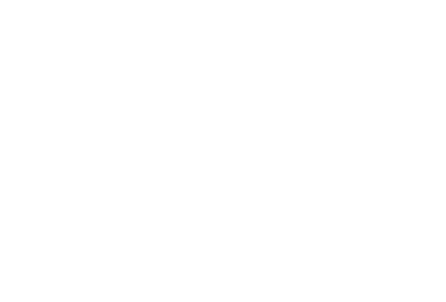

In [9]:
for counter in range(8):
    print (counter)
    y, sr = lb.load(input_files[counter])
    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    S = lb.feature.melspectrogram(y, sr)
    r = len(S)    # 3 rows in your example
    c = len(S[0]) # 2 columns in your example

    s1=[]
    ss1=[]
    ss2=[]
    ss3=[]
    ss4=[]
    sm=0
    for i in range(0,c):
        for j in range(0,r):
            sm=sm+S[j][i]
    sm=sm/(r*c)
    S=S*(100/sm)
    for i in range(0,c):
        x=0
        for j in range(0,r):
            x=x+S[j][i]
            sm=sm+S[j][i]
        s1.append(x)
    ind=0
    ind2=0
    f=0
    g=int(c/4)
    for i in range(0,c-7,g):
        x=s1[i]
        if x>3 and f==0:
            ind=i
            f=f+1
        elif f==1:
            ind2=i
            break
    g=int((c-ind)/4)
    for i in range(0,r):
        temp=[]
        for j in range(ind,ind2-1):
            x1=ind2-1-ind
            temp.append(S[i][j])
        ss1.append(temp)

    ind=ind2
    f=0
    for i in range(ind2,c-7,g):
        x=s1[i]
        if x>3 and f==0:
            ind=i
            f=f+1
        elif f==1:
            ind2=i
            break
    for i in range(0,r):
        temp2=[]
        for j in range(ind,ind2-1):
            x2=ind2-1-ind
            temp2.append(S[i][j])
        ss2.append(temp2)
    ind=0
    f=0
    for i in range(ind2,c-7,g):
        x=s1[i]
        if x>3 and f==0:
            ind=i
            f=f+1
        elif f==1:
            ind2=i
            break
    for i in range(0,r):
        temp=[]
        for j in range(ind,ind2-1):
            x3=ind2-1-ind
            temp.append(S[i][j])
        ss3.append(temp)
    ind=0
    f=0
    for i in range(0,r):
        temp=[]
        for j in range(ind2-3,c):
            x4=c-ind2+3
            temp.append(S[i][j])
        ss4.append(temp)

    c2=len(ss1[0])
    t=40
    import math
    def normal_round(n):
        return math.ceil(n)
    while c2<t:
        x7=[]
        for i in range(1,c2,normal_round(t/c2)):
            c2=len(ss1[0])
            if(c2>=t):
                break
            for j in range(0,r):
                ss1[j].insert(i+1,ss1[j][i-1])
            c2=len(ss1[0])
    c2=len(ss1[0])
    while c2>t:
        for i in range(1,c2,normal_round(c2/t)):
            c2=len(ss1[0])
            if(c2<=t):
                break
            for j in range(0,r):
                if i>=c2:
                    i=c2-1
                ss1[j].pop(i)
            c2=len(ss1[0])

    c2=len(ss2[0])
    t=40
    import math
    def normal_round(n):
        return math.ceil(n)
    while c2<t:
        x7=[]
        for i in range(1,c2,normal_round(t/c2)):
            c2=len(ss2[0])
            if(c2>=t):
                break
            for j in range(0,r):
                ss2[j].insert(i+1,ss2[j][i-1])
            c2=len(ss2[0])
    c2=len(ss2[0])
    while c2>t:
        for i in range(1,c2,normal_round(c2/t)):
            c2=len(ss2[0])
            if(c2<=t):
                break
            for j in range(0,r):
                if i>=c2:
                    i=c2-1
                ss2[j].pop(i)
            c2=len(ss2[0])

    c2=len(ss3[0])
    t=40
    import math
    def normal_round(n):
        return math.ceil(n)
    while c2<t:
        x7=[]
        for i in range(1,c2,normal_round(t/c2)):
            c2=len(ss3[0])
            if(c2>=t):
                break
            for j in range(0,r):
                ss3[j].insert(i+1,ss3[j][i-1])
            c2=len(ss3[0])
    c2=len(ss3[0])
    while c2>t:
        for i in range(1,c2,normal_round(c2/t)):
            c2=len(ss3[0])
            if(c2<=t):
                break
            for j in range(0,r):
                if i>=c2:
                    i=c2-1
                ss3[j].pop(i)
            c2=len(ss3[0])

    c2=len(ss4[0])
    t=40
    import math
    def normal_round(n):
        return math.ceil(n)
    while c2<t:
        x7=[]
        for i in range(1,c2,normal_round(t/c2)):
            c2=len(ss4[0])
            if(c2>=t):
                break
            for j in range(0,r):
                ss4[j].insert(i+1,ss4[j][i-1])
            c2=len(ss4[0])
    c2=len(ss4[0])
    while c2>t:
        for i in range(1,c2,normal_round(c2/t)):
            c2=len(ss4[0])
            if(c2<=t):
                break
            for j in range(0,r):
                if i>=c2:
                    i=c2-1
                ss4[j].pop(i)
            c2=len(ss4[0])
    
    sss1 = np.array(ss1)
    s6 = np.log10(sss1+0.0001)+5
    
    sss2 = np.array(ss2)
    s7 = np.log10(sss2+0.0001)+5
    
    sss3 = np.array(ss3)
    s8 = np.log10(sss3+0.0001)+5
    
    sss4 = np.array(ss4)
    s9 = np.log10(sss4+0.0001)+5
    
    
    
    t1 = s6.reshape(128, 40, 1)
    t2 = s7.reshape(128, 40, 1)
    t3 = s8.reshape(128, 40, 1)
    t4 = s9.reshape(128, 40, 1)
    
    l1 = [0,0,0,0,0,0,0,0,0,0]
    l1[real_output[counter][0]] = 1
    
    l2 = [0,0,0,0,0,0,0,0,0,0]
    l2[real_output[counter][1]] = 1
    
    l3 = [0,0,0,0,0,0,0,0,0,0]
    l3[real_output[counter][2]] = 1
    
    l4 = [0,0,0,0,0,0,0,0,0,0]
    l4[real_output[counter][3]] = 1
    
    tx=[t1,t2,t3,t4]
    lx=[l1,l2,l3,l4]
    train_data=np.concatenate((train_data,tx), axis=0, out=None)
    label=np.concatenate((label,lx), axis=0, out=None)
    

In [10]:
label.shape

(32, 10)

In [11]:
save_path = 'test.jpg'

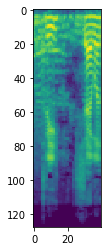

In [12]:
sss1 = np.array(ss1)
s6 = np.log10(sss1+0.0001)+5
plt.imshow(s6)

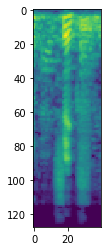

In [13]:
sss2 = np.array(ss2)
s7 = np.log10(sss2+0.0001)+5
plt.imshow(s7)

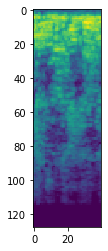

In [14]:
sss3 = np.array(ss3)
s8 = np.log10(sss3+0.0001)+5
plt.imshow(s8)

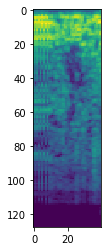

In [15]:
sss4 = np.array(ss4)
s9 = np.log10(sss4+0.0001)+5
plt.imshow(s9)

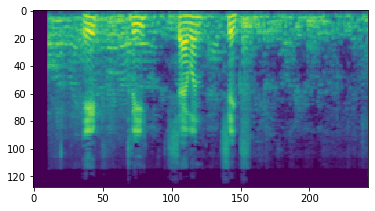

In [16]:
s = np.log10(S+0.0001)+5
plt.imshow(s)

In [17]:
s6.shape

(128, 40)

In [18]:
s7.shape

(128, 40)

In [19]:
s8.shape

(128, 40)

In [20]:
s9.shape

(128, 40)

In [21]:
# t1 = np.asarray(s6, dtype=float)

# train_data = [td]






train_data.shape

(32, 128, 40, 1)

In [22]:
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 40, 1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [25]:
model.fit( train_data, label , epochs = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
32/32 [==============================] - 0s 10ms/sample - loss: 0.0948 - acc: 0.1250
Epoch 2/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0951 - acc: 0.0938
Epoch 3/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0940 - acc: 0.2188
Epoch 4/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0942 - acc: 0.0938
Epoch 5/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0920 - acc: 0.1250
Epoch 6/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0900 - acc: 0.2188
Epoch 7/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0891 - acc: 0.2188
Epoch 8/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0886 - acc: 0.2188
Epoch 9/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0882 - acc: 0.2188
Epoch 10/50
32/32 [==============================] - 0s 4ms/sample - loss: 0.0879 - acc: 0.2188


In [27]:
model.save_weights('./checkpoint_model_1/my_checkpoint')


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


In [26]:
# prediction = model.predict([train_data])

In [ ]:
# print(np.argmax(prediction[1]))